In [1]:
import pandas as pd

/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_excel('../../usr/Company_HR_Employees.xlsx')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,2068,2,...,1,80,0,6,3,4,4,3,1,2
1,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,4,80,0,17,3,2,9,6,0,8
2,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,2,80,1,6,0,3,6,2,0,3
3,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,1,80,1,9,5,3,7,7,1,7
4,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,80,1,17,3,3,5,2,0,3


In [4]:
df.shape

(1470, 34)

In [5]:
dct = {name:df[name].unique() for name in df}

In [6]:
[(name,len(dct[name])) for name in dct if len(dct[name])<2]

[('Over18', 1), ('StandardHours', 1)]

In [7]:
df1 = df.drop(['Over18','StandardHours'],axis=1)
df1 = df1.drop(['EmployeeNumber'],axis=1)

In [8]:
[(name,list(dct[name])) for name in dct if len(dct[name])==3]

[('BusinessTravel', ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']),
 ('Department', ['Research & Development', 'Sales', 'Human Resources']),
 ('MaritalStatus', ['Married', 'Single', 'Divorced'])]

In [10]:
df1['Gender'] = df1['Gender'].map({'Female':0, 'Male':1})
df1['Attrition'] = df1['Attrition'].map({'No':0,'Yes':1})
df1['OverTime'] = df1['OverTime'].map({'No':0,'Yes':1})
df1['PerformanceRating'] = df1['PerformanceRating'].map({3:0,4:1})

In [11]:
[names for names in df1 if type(df1[names][0]) == str]

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [12]:
import string

def normalize(st : str):
    l = ''
    for s in st:
        if s in string.ascii_letters:
            l += s
    return l

In [13]:
df2 = df1.drop([names for names in df1 if type(df1[names][0]) == str],axis=1)
for name in [names for names in df1 if type(df1[names][0]) == str]:
    dd = pd.get_dummies(df1[name])
    for dummy in dd:
        df2[f'{name}_{normalize(dummy)}'] = dd[dummy]

In [14]:
df2.shape

(1470, 50)

In [15]:
#df2.info()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

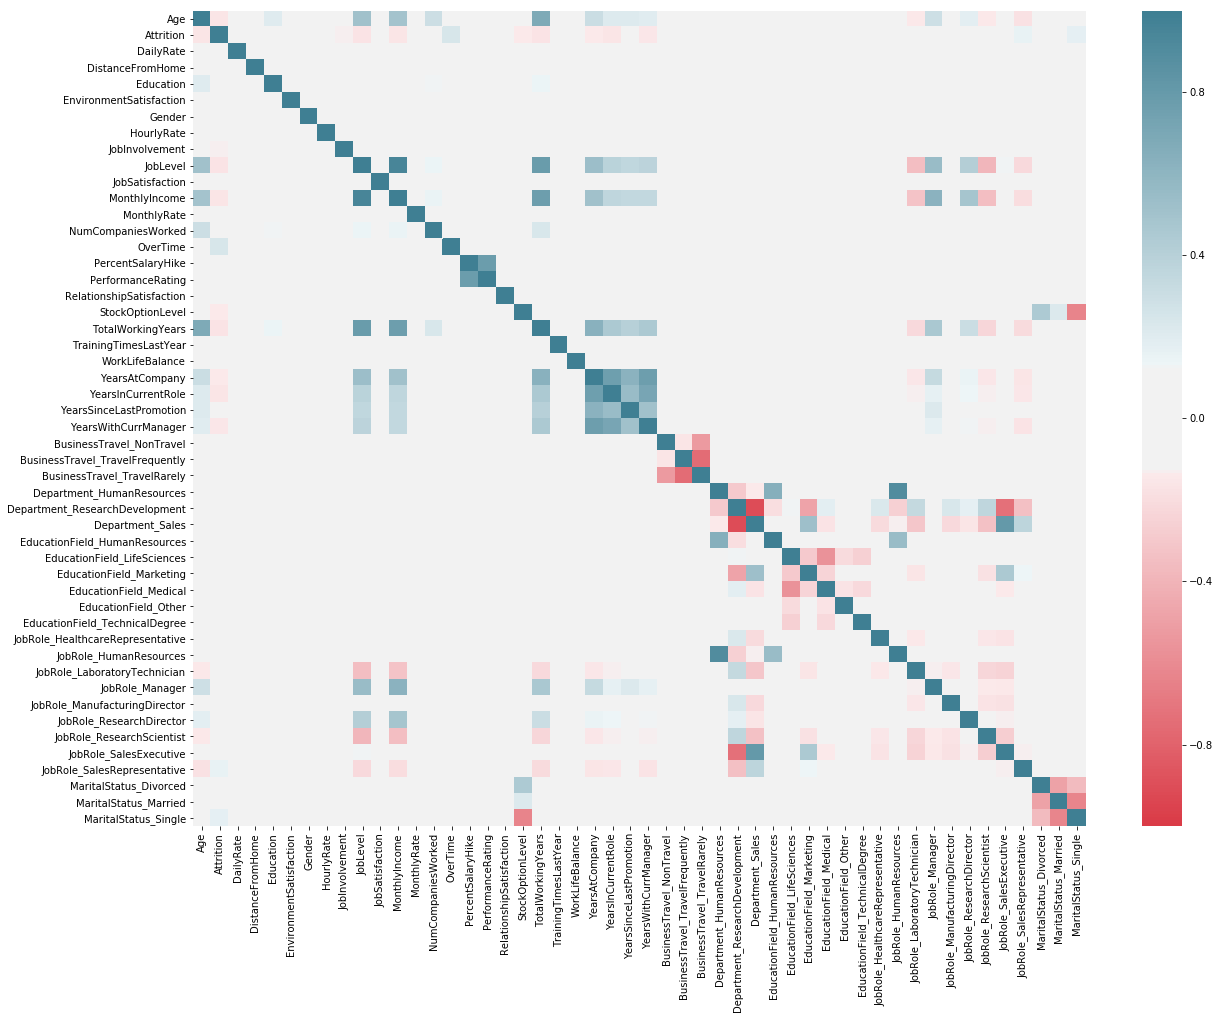

In [17]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 15)
cmap = sns.diverging_palette(10, 220, sep=33, center='light', as_cmap=True)
sns.heatmap(df2.corr(),ax=ax,cmap=cmap,vmin=-1,vmax=1);

In [18]:
#df2.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [19]:
df_corr = df2.corr('spearman')
cols = df_corr.columns
pairs = []
for i in range(df2.shape[1]):
    for j in range(i):
        pairs.append((cols[i],cols[j],df_corr[cols[i]][cols[j]]))

In [20]:
#df_corr['Attrition']

In [21]:
g = lambda i:(i[0],i[1],round(i[2],2))
[g(i) for i in sorted(pairs,key=lambda x:abs(x[2]),reverse=True) if abs(i[2]) >= 0.75]

[('MonthlyIncome', 'JobLevel', 0.92),
 ('Department_Sales', 'Department_ResearchDevelopment', -0.91),
 ('JobRole_HumanResources', 'Department_HumanResources', 0.9),
 ('YearsInCurrentRole', 'YearsAtCompany', 0.85),
 ('YearsWithCurrManager', 'YearsAtCompany', 0.84),
 ('JobRole_SalesExecutive', 'Department_Sales', 0.81),
 ('BusinessTravel_TravelRarely', 'BusinessTravel_TravelFrequently', -0.75)]

In [22]:
[i for i in sorted(pairs,key=lambda x:abs(x[2]),reverse=True) if abs(i[2]) >= 0.5]

[('MonthlyIncome', 'JobLevel', 0.9204286748392109),
 ('Department_Sales', 'Department_ResearchDevelopment', -0.9068182538582095),
 ('JobRole_HumanResources', 'Department_HumanResources', 0.9049828109446679),
 ('YearsInCurrentRole', 'YearsAtCompany', 0.8539995332892505),
 ('YearsWithCurrManager', 'YearsAtCompany', 0.8428033421828458),
 ('JobRole_SalesExecutive', 'Department_Sales', 0.808869270845929),
 ('BusinessTravel_TravelRarely',
  'BusinessTravel_TravelFrequently',
  -0.7530917316140997),
 ('TotalWorkingYears', 'JobLevel', 0.7346775906318871),
 ('MaritalStatus_Single', 'StockOptionLevel', -0.7338788649283559),
 ('JobRole_SalesExecutive',
  'Department_ResearchDevelopment',
  -0.7334974197880683),
 ('YearsWithCurrManager', 'YearsInCurrentRole', 0.7247542192761358),
 ('TotalWorkingYears', 'MonthlyIncome', 0.7100243140565019),
 ('TotalWorkingYears', 'Age', 0.656895823213162),
 ('EducationField_HumanResources',
  'Department_HumanResources',
  0.6464359348608475),
 ('MaritalStatus_Sing

In [23]:
def g(x):
    if x < 5000:
        return x*0.9
    elif x < 10000:
        return x * 0.8
    elif x < 15000:
        return x * 0.65
    else:
        return x * 0.5

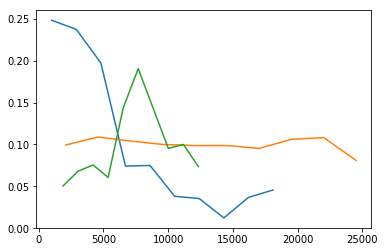

In [24]:
import numpy as np
x, y = np.histogram(df2['MonthlyIncome'],bins=10)
plt.plot(y[:-1],x/sum(x))
x, y = np.histogram(df2['MonthlyRate'],bins=10)
plt.plot(y[:-1],x/sum(x))
x, y = np.histogram([g(x) for x in df2['MonthlyRate']],bins=10)
plt.plot(y[:-1],x/sum(x))
#len(x), len(y)

In [25]:
#Clear data
df_true = df2[df2['Attrition'] == 1]
df_false = df2[df2['Attrition'] == 0]

In [26]:
df_true.shape, df_false.shape

((237, 50), (1233, 50))

In [45]:
df_clr = pd.concat([df_true,df_false.sample(df_true.shape[0])])

In [28]:
df_clr.shape, df_clr['Attrition'].mean()

((474, 50), 0.5)

In [164]:
df_X = df_clr.drop(['Attrition'],axis=1)

In [165]:
df_Y = df_clr['Attrition']

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [32]:
from sklearn.metrics import r2_score, roc_auc_score, accuracy_score, roc_curve

In [166]:
x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3,random_state=7)

In [157]:
#tr = RandomForestRegressor(n_estimators=1000,max_depth=10)
tr = RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=7)
params = {'n_estimators':[100,1000],'max_depth':[4,6,8,10,12,14]}

In [167]:
from xgboost import XGBClassifier
tr = XGBClassifier(max_depth=10,n_estimators=1000,random_state=7,silent=True)
params = {'n_estimators':[100,1000],'max_depth':[4,6,8,10,12,14]}

In [168]:
gr = GridSearchCV(tr,param_grid=params, n_jobs=6, cv=5)

In [169]:
gr.fit(x_train,y_train)

/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig

/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig

/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig

/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig

/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=7,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=6,
       param_grid={'n_estimators': [100, 1000], 'max_depth': [4, 6, 8, 10, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [170]:
gr.best_score_, gr.best_params_

(0.716012084592145, {'max_depth': 6, 'n_estimators': 100})

In [171]:
y_pred = gr.best_estimator_.predict(x_test)

/home/xelmar/.local/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [506]:
#Regression
r2_score(y_test,y_pred)

In [172]:
#Classification
accuracy_score(y_test,y_pred)

0.7272727272727273

In [40]:
fi = (gr.best_estimator_.feature_importances_ / max(gr.best_estimator_.feature_importances_)).round(4)
fi = zip(df_X.columns,fi)
fi_s = sorted(list(fi), key=lambda x:x[1],reverse=True)

In [41]:
list(fi_s)[:10]

[('MonthlyIncome', 1.0),
 ('OverTime', 0.8504),
 ('Age', 0.7168),
 ('YearsWithCurrManager', 0.6543),
 ('YearsInCurrentRole', 0.5876),
 ('YearsAtCompany', 0.5693),
 ('TotalWorkingYears', 0.4055),
 ('MonthlyRate', 0.3375),
 ('DailyRate', 0.3314),
 ('NumCompaniesWorked', 0.2978)]

In [42]:
from sklearn.tree import export_graphviz
max([(accuracy_score(y_train,tree.predict(x_train)),i) for i, tree in enumerate(gr.best_estimator_)],key= lambda x:x[0]) 
export_graphviz(gr.best_estimator_[i],feature_names=list(df_X.columns), out_file='./out_tree.dot', filled=True, leaves_parallel=True, rounded=True, proportion=True, max_depth=3)
!dot -Tpng './out_tree.dot' -o "./out_tree.png"

In [50]:
df_clr.pivot_table(index='Attrition',values=['MonthlyIncome','OverTime','Age','YearsWithCurrManager',
                                             'YearsInCurrentRole','YearsAtCompany'],aggfunc=np.mean)

,Age,MonthlyIncome,OverTime,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
Attrition,,,,,,
0,37.497890,6705.434599,0.210970,6.995781,4.388186,4.181435
1,33.607595,4787.092827,0.535865,5.130802,2.902954,2.852321


In [54]:
pd.DataFrame(df1.isnull().sum().sort_values(ascending=False)[:10])

,0
YearsWithCurrManager,0
JobSatisfaction,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0


In [86]:
name_main = 'Attrition'
g = lambda x: (x[0],x[2]) if x[0] != name_main else (x[1],x[2])
[g(i) for i in sorted(pairs,key=lambda x:abs(x[2]),reverse=True) if i[0] == name_main or i[1] == name_main][:10]

[('OverTime', 0.2461179942458043),
 ('TotalWorkingYears', -0.1990020196452588),
 ('MonthlyIncome', -0.19830500478881558),
 ('YearsAtCompany', -0.1904190982724079),
 ('JobLevel', -0.190370423968158),
 ('YearsInCurrentRole', -0.1806230299708929),
 ('MaritalStatus_Single', 0.17541855360921968),
 ('YearsWithCurrManager', -0.17535508134266475),
 ('StockOptionLevel', -0.1722957997617838),
 ('Age', -0.171214157037135)]

In [87]:
df_X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_NonTravel',
       'BusinessTravel_TravelFrequently', 'BusinessTravel_TravelRarely',
       'Department_HumanResources', 'Department_ResearchDevelopment',
       'Department_Sales', 'EducationField_HumanResources',
       'EducationField_LifeSciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_TechnicalDegree', 'JobRole_HealthcareRepresentative',
       'JobRole_HumanResources', 'JobRole_Labora

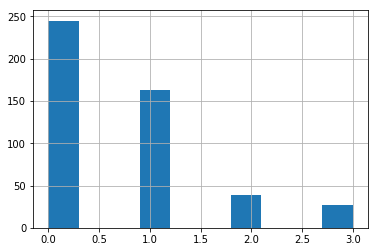

In [94]:
df_clr['StockOptionLevel'].hist()

In [76]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [128]:
pca = PCA(n_components=x_train.shape[1])
sc = StandardScaler()

In [129]:
X_std = sc.fit(x_train)

In [130]:
X_std_pca = pca.fit(X_std.transform(x_train))

In [131]:
x_train_new = X_std_pca.transform(X_std.transform(x_train))

In [132]:
x_test_new = X_std_pca.transform(X_std.transform(x_test))

In [134]:
#X_std_pca.shape

In [138]:
[i.std() for i in x_train_new.T][:10]

[2.4210192718211756,
 1.918316077538659,
 1.7777763425107131,
 1.5323182843518157,
 1.4411616991339822,
 1.3669865269595043,
 1.3184203845599836,
 1.310661631073264,
 1.2613952034356428,
 1.2292291324043136]

In [136]:
[i.std() for i in x_test_new.T][:10]

[2.3395055734668198,
 1.8459816706717378,
 1.8930596566941986,
 1.4253291331960456,
 1.3661833221462543,
 1.1703187331219724,
 1.1975694448795422,
 1.2919867773670832,
 1.1436869410443604,
 0.9542049759243062]

In [139]:
#tr = RandomForestRegressor(n_estimators=1000,max_depth=10)
tr = RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=7)
params = {'n_estimators':[100,1000],'max_depth':[4,6,8,10,12,14]}

In [140]:
gr = GridSearchCV(tr,param_grid=params, n_jobs=6, cv=5)

In [141]:
gr.fit(x_train_new,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=6,
       param_grid={'n_estimators': [100, 1000], 'max_depth': [4, 6, 8, 10, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [142]:
gr.best_score_, gr.best_params_

(0.7129909365558912, {'max_depth': 6, 'n_estimators': 1000})

In [145]:
y_pred = gr.best_estimator_.predict(x_test_new)

In [146]:
#Classification
accuracy_score(y_test,y_pred)

0.7342657342657343

In [148]:
x_train_new[:4,:10]

array([[-2.68810396, -1.55629639, -0.35613723, -0.83725625, -0.438911  ,
         1.8526895 , -2.00371946,  2.53515835, -1.36320784, -1.02028335],
       [ 0.7141939 ,  2.10239699, -0.9790695 , -0.02637198, -1.1597461 ,
        -1.83255486, -0.44389537,  0.11200128,  0.68416716, -0.8839483 ],
       [-2.79017634, -1.42300615,  0.25702823, -1.18718307,  0.79031076,
        -0.96556157, -2.31128627, -0.7854375 ,  0.26735604,  0.41125497],
       [-2.34001083, -1.05157166,  0.4526682 ,  0.73403537,  3.37555974,
        -1.2949621 , -0.41048845, -0.38376375,  0.13494058, -1.72237842]])